1) We have three files: portfolio.csv, transcript.csv, and profile.csv

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


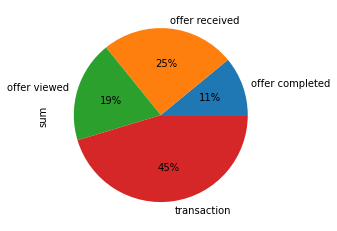

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
port = pd.read_csv("portfolio.csv")
trans = pd.read_csv("transcript.csv")
prof = pd.read_csv("profile.csv")
trans

trans2 = trans.copy()
trans2["sum"] = 1
fi, ax = plt.subplots()
trans2_plot = trans2.groupby("event").sum()["sum"].plot.pie(autopct = '%.0f%%')
trans2_plot
trans

In [2]:

#since we are predciting transactions, we seperate the transactions from the rest of the dataset
df = trans.copy().reset_index()

#merge profile and transcript by customer id so that we have demographics of each person who made a transaction
df = df.merge(prof, left_on="person", right_on="id")[["person", "value", "age", "income", "gender"]]
df["value"] = df["value"].str.replace("{", "", regex = True)
df["value"] = df["value"].str.replace("}", "", regex = True)
df["value"] = df["value"].str.replace("amount", "", regex = True)
df["value"] = df["value"].str.replace("id", "", regex = True)

df["value"] = df["value"].str.replace("offer", "", regex = True)
df["value"] = df["value"].str.replace(":", "", regex = True)
df["value"] = df["value"].str.replace("'", "", regex = True)
df["value"] = df["value"].str.replace("_", "", regex = True)


del df["person"]
df = df.reset_index()

df

#cleaning is done, time to implement knn

,index,value,age,income,gender
0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,100000.0,F
1,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,100000.0,F
2,2,19.89,75,100000.0,F
3,3,"9b98b8c7a33c4b65b9aebfe6a799e6d9, reward 5",75,100000.0,F
4,4,17.78,75,100000.0,F
...,...,...,...,...,...
306529,306529,4d5c57ea9a6940dd891ad53e9dbe8da0,118,NaN,NaN
306530,306530,4d5c57ea9a6940dd891ad53e9dbe8da0,118,NaN,NaN
306531,306531,4d5c57ea9a6940dd891ad53e9dbe8da0,58,78000.0,F
306532,306532,4d5c57ea9a6940dd891ad53e9dbe8da0,58,78000.0,F


In [3]:
#dylan do your work here

Predicting how much a customer will spend based on the age, income, and sex

In [15]:

#since we are predciting transactions, we seperate the transactions from the rest of the dataset
moneySpent = trans[trans["event"] == "transaction"].copy().reset_index()

#merge profile and transcript by customer id so that we have demographics of each person who made a transaction
moneySpent = moneySpent.merge(prof, left_on="person", right_on="id")[["person", "value", "age", "income", "gender"]]
moneySpent["value"] = moneySpent["value"].str.replace("{", "", regex = True)
moneySpent["value"] = moneySpent["value"].str.replace("}", "", regex = True)
moneySpent["value"] = moneySpent["value"].str.replace("amount", "", regex = True)
moneySpent["value"] = moneySpent["value"].str.replace(":", "", regex = True)
moneySpent["value"] = moneySpent["value"].str.replace("''", "", regex = True)
moneySpent["value"] = moneySpent["value"].astype(float)

#creating one hot encoding for gender
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
data = asarray([['F'], ['M'], ['O']])
print(data)

encoder = OneHotEncoder(sparse=False)

onehot = encoder.fit_transform(data)
print(onehot)

#implement onehot
moneySpent["F"] = moneySpent["gender"].copy()
moneySpent["M"] = moneySpent["gender"].copy()
moneySpent["O"] = moneySpent["gender"].copy()

moneySpent["F"] = moneySpent["F"].replace("F", 1)
moneySpent["F"] = moneySpent["F"].replace("M", 0)
moneySpent["F"] = moneySpent["F"].replace("O", 0)
moneySpent["F"]  = moneySpent["F"].fillna(0)
moneySpent["F"]  = moneySpent["F"].astype(int)


moneySpent["M"] = moneySpent["M"].replace("M", 1)
moneySpent["M"] = moneySpent["M"].replace("F", 0)
moneySpent["M"] = moneySpent["M"].replace("O", 0)
moneySpent["M"]  = moneySpent["M"].fillna(0)
moneySpent["M"]  = moneySpent["M"].astype(int)


moneySpent["O"] = moneySpent["O"].replace("O", 1)
moneySpent["O"] = moneySpent["O"].replace("M", 0)
moneySpent["O"] = moneySpent["O"].replace("F", 0)
moneySpent["O"]  = moneySpent["O"].fillna(0)
moneySpent["O"]  = moneySpent["O"].astype(int)


moneySpent["gender"]  = moneySpent["gender"].replace("F", True)
moneySpent["gender"]  = moneySpent["gender"].replace("M", True)
moneySpent["gender"]  = moneySpent["gender"].replace("O", True)
moneySpent["gender"]  = moneySpent["gender"].fillna(False)
moneySpent["gender"]  = moneySpent["gender"].astype(bool)

#drop rows with no income
moneySpent = moneySpent.dropna(subset=["income"])

del moneySpent["person"]
moneySpent = moneySpent.reset_index()

#cleaning is done, time to implement knn

[['F']
 ['M']
 ['O']]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
%matplotlib inline

train= train_test_split(moneySpent, test_size = 0.2)
test = train_test_split(moneySpent, test_size = 0.2)

del train[0]
display(train)
#y_train = train["value"]

#x_train = train.drop("value", axis=1)

'''x_test = test.drop("value", axis=1)
y_test = test["value"]

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

rmse_val = [] 
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
'''

[       index  value  age    income  gender  F  M  O
 9899   10819  16.23   60   83000.0    True  1  0  0
 24187  26740  15.30   50   73000.0    True  0  1  0
 28858  31890   5.79   22   65000.0    True  1  0  0
 85705  95148  23.81   80   70000.0    True  1  0  0
 64999  71992  16.60   78   93000.0    True  0  1  0
 ...      ...    ...  ...       ...     ... .. .. ..
 68297  75629  21.05   19   52000.0    True  1  0  0
 64981  71974  25.76   39   86000.0    True  0  1  0
 13585  15008   1.35   28   53000.0    True  0  1  0
 22821  25260  22.24   59  105000.0    True  0  1  0
 79133  87767   0.86   38   32000.0    True  0  1  0
 
 [24792 rows x 8 columns]]

'x_test = test.drop("value", axis=1)\ny_test = test["value"]\n\nscaler = MinMaxScaler(feature_range=(0, 1))\n\nx_train_scaled = scaler.fit_transform(x_train)\nx_train = pd.DataFrame(x_train_scaled)\n\nx_test_scaled = scaler.fit_transform(x_test)\nx_test = pd.DataFrame(x_test_scaled)\n\nrmse_val = [] \nfor K in range(10):\n    K = K+1\n    model = neighbors.KNeighborsRegressor(n_neighbors = K)\n\n    model.fit(x_train, y_train)  #fit the model\n    pred=model.predict(x_test) #make prediction on test set\n    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse\n    rmse_val.append(error) #store rmse values\n    \n'